#🛠️Preparação dos dados

In [1]:
#Importanto bibliotecas e extração do arquivo tratado

import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


df_telecom = pd.read_csv('/content/tabela tratada.csv')
df_telecom.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [2]:
#Remoção da coluna irrelevante para análise "costumerID"

df_telecom = df_telecom.drop(columns=['customerID'])
df_telecom


,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.60,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.90,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,1.90,55.15,742.90
7039,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.84,85.10,1873.70
7040,No,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,1.55,50.30,92.75
7041,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,2.30,67.85,4627.65


In [3]:
#Criando a cópia do DataFrame
df_clean = df_telecom.copy()

#Agrupar "No internet service" e substituir como "No"
cols_to_fix = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

#One-hot encoding (sem dummy trap) - Lista com o nome de todas as colunas que contêm dados categóricos (texto) e precisam ser transformadas.
categorical_cols = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)


df_encoded.head()

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.6,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.9,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.9,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.0,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.9,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


In [4]:
#Verificar se as colunas possuem valores nulos
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,11
account.Charges.Monthly,0
account.Charges.Total,11
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


In [5]:
#Remoção dos valores nulos nas colunas indicadas
df_encoded = df_encoded.dropna(subset=['Total.Day', 'account.Charges.Total'])

In [6]:
#Constatando que colunas não possuem mais valores nulos
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,0
account.Charges.Monthly,0
account.Charges.Total,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


In [7]:
#Análise da contagem e proporção de clientes evadidos
print('Contagem de clientes evadidos:\n')
print(df_encoded['Churn_Yes'].value_counts())
print('\nProporção de clientes evadidos:\n')
print(df_encoded['Churn_Yes'].value_counts(normalize=True))


Contagem de clientes evadidos:

Churn_Yes
False    5163
True     1869
Name: count, dtype: int64

Proporção de clientes evadidos:

Churn_Yes
False    0.734215
True     0.265785
Name: proportion, dtype: float64


In [8]:
#Balanceamento de classes com a ferramenta SMOTE
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

if X.isnull().sum().sum() > 0:
    print('Valores ausentes encontrados. Preenchendo com a média.')
    X = X.fillna(X.mean())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print('Distribuição de "Churn_Yes" após o SMOTE:')
print(y_resampled.value_counts())

Distribuição de "Churn_Yes" após o SMOTE:
Churn_Yes
False    5163
True     5163
Name: count, dtype: int64


##🎯Correlação e Seleção de Variáveis

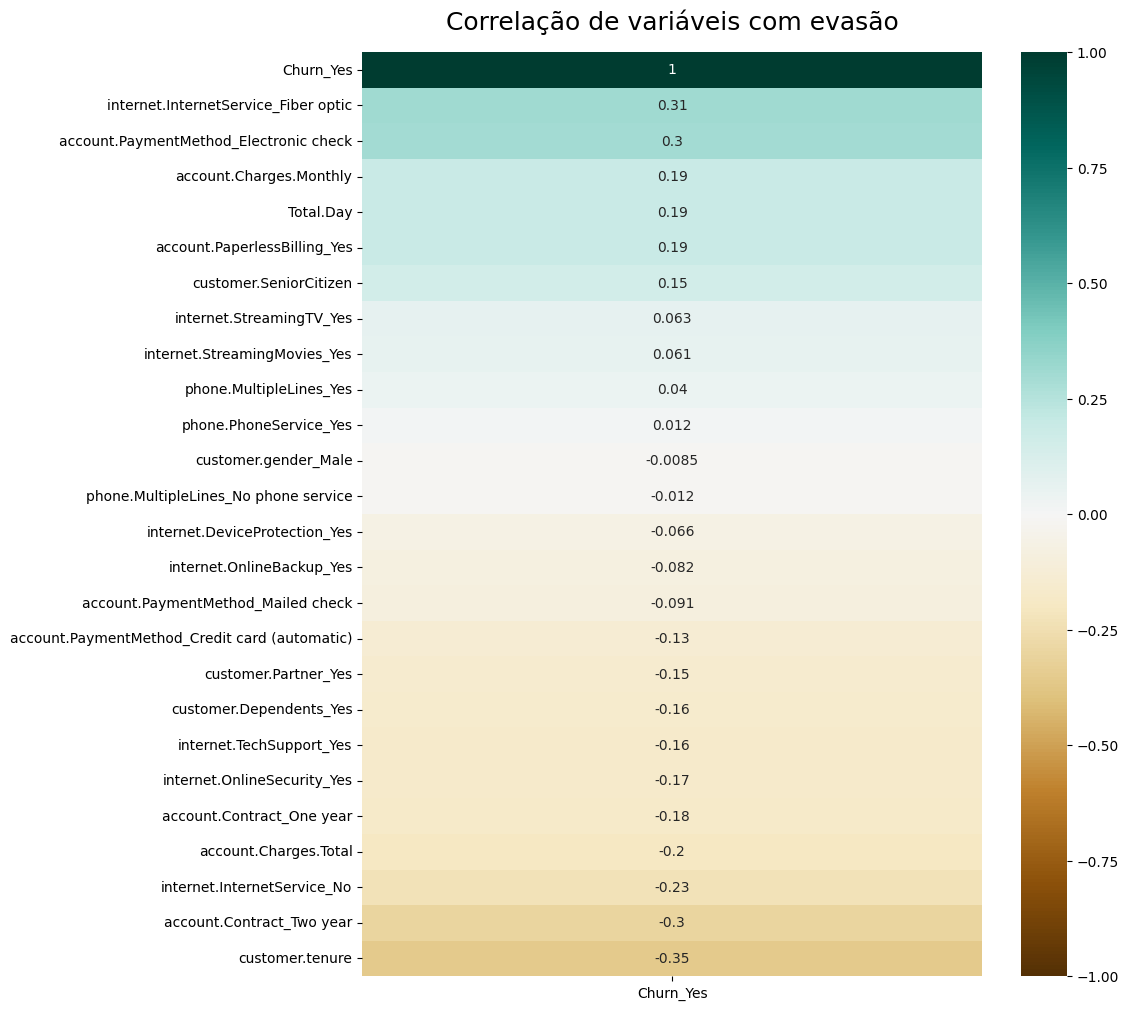

In [9]:
plt.figure(figsize=(10, 12))

# Gera a matriz de correlação do DataFrame e seleciona apenas os valores relacionados à variável 'Churn'.

# Classifica os resultados para destacar as variáveis com maior correlação, seja positiva ou negativa.

heatmap = sns.heatmap(
    df_encoded.corr(numeric_only=True)[['Churn_Yes']].sort_values(by='Churn_Yes', ascending=False),
    vmin=-1, vmax=1, annot=True, cmap='BrBG'
)

heatmap.set_title('Correlação de variáveis com evasão', fontdict={'fontsize':18}, pad=16);

In [10]:
df_encoded.columns

Index(['customer.SeniorCitizen', 'customer.tenure', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total', 'Churn_Yes',
       'customer.gender_Male', 'customer.Partner_Yes',
       'customer.Dependents_Yes', 'phone.PhoneService_Yes',
       'phone.MultipleLines_No phone service', 'phone.MultipleLines_Yes',
       'internet.InternetService_Fiber optic', 'internet.InternetService_No',
       'internet.OnlineSecurity_Yes', 'internet.OnlineBackup_Yes',
       'internet.DeviceProtection_Yes', 'internet.TechSupport_Yes',
       'internet.StreamingTV_Yes', 'internet.StreamingMovies_Yes',
       'account.Contract_One year', 'account.Contract_Two year',
       'account.PaperlessBilling_Yes',
       'account.PaymentMethod_Credit card (automatic)',
       'account.PaymentMethod_Electronic check',
       'account.PaymentMethod_Mailed check'],
      dtype='object')

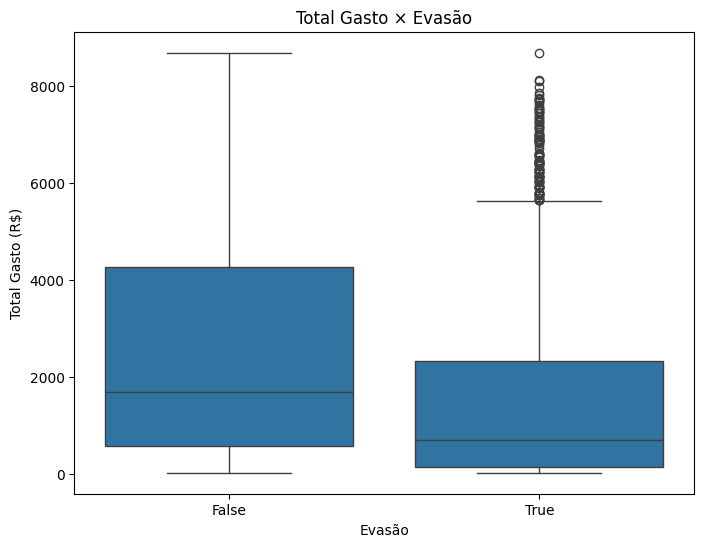

In [11]:
#Boxplot para analisar como variáveis específicas se relacionam com a evasão, total gasto x evasão.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn_Yes', y='account.Charges.Total', data=df_encoded)
plt.title('Total Gasto × Evasão')
plt.xlabel('Evasão')
plt.ylabel('Total Gasto (R$)')
plt.show()



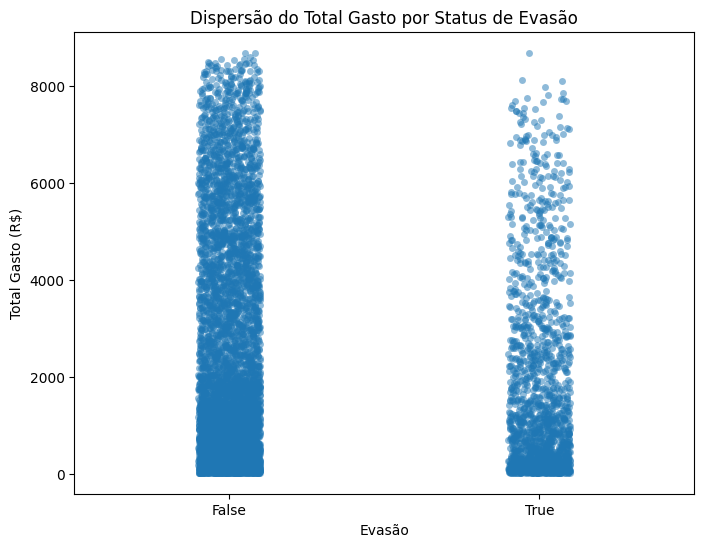

In [12]:
#Dispersão (Scatter com jitter) - Total gasto x evasão.
plt.figure(figsize=(8, 6))
sns.stripplot(x='Churn_Yes', y='account.Charges.Total', data=df_encoded, jitter=True, alpha=0.5)
plt.title('Dispersão do Total Gasto por Status de Evasão')
plt.xlabel('Evasão')
plt.ylabel('Total Gasto (R$)')
plt.show()



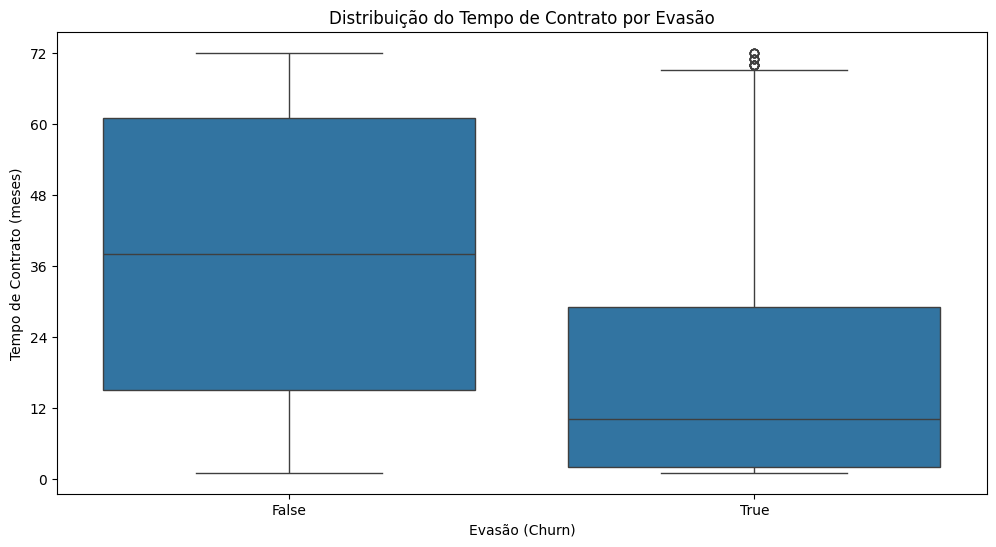

In [13]:
#Boxplot para analisar como variáveis específicas se relacionam com a evasão, tempo de contrato x evasão.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn_Yes', y='customer.tenure', data=df_encoded)
plt.title('Distribuição do Tempo de Contrato por Evasão')
plt.xlabel('Evasão (Churn)')
plt.ylabel('Tempo de Contrato (meses)')

# Definir os marcadores do eixo y para mostrar a cada 12 meses (tempo de contrato)
plt.yticks(range(0, df_encoded['customer.tenure'].max() + 1, 12))

plt.show()


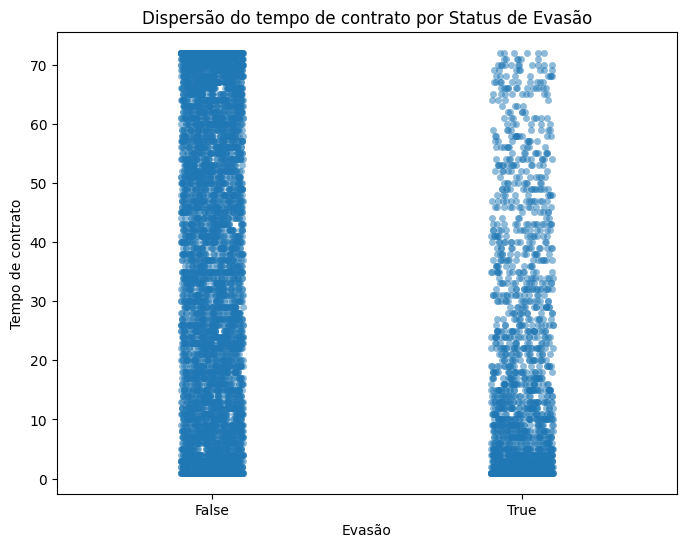

In [14]:
#Dispersão (Scatter com jitter) - Tempo de contrato x evasão.
plt.figure(figsize=(8, 6))
sns.stripplot(x='Churn_Yes', y='customer.tenure', data=df_encoded, jitter=True, alpha=0.5)
plt.title('Dispersão do tempo de contrato por Status de Evasão')
plt.xlabel('Evasão')
plt.ylabel('Tempo de contrato')
plt.show()

##🤖 Modelagem Preditiva

In [15]:
#Separação de dados
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (7228, 25)
Shape of X_test: (3098, 25)
Shape of y_train: (7228,)
Shape of y_test: (3098,)


In [16]:
#Normalização dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

📊 Modelo de Regressão Logistíca

In [17]:
from sklearn.linear_model import LogisticRegression

#Treinando a Regressão Logística com dados normalizados
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Previsões
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Previsões de probabilidade (necessário para ROC e Precision-Recall)
# y_proba_logistic[:, 1] pega a probabilidade da classe positiva (1)
y_proba_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#Visualização com 'print' das métricas de avaliação
def evaluate_model(y_test, y_pred, model_name):
    print(f"--- Avaliação do Modelo: {model_name} ---")
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precisão: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))
    print("-" * 40)

# Avaliando a Regressão Logística
evaluate_model(y_test, y_pred_logistic, "Regressão Logística")

--- Avaliação do Modelo: Regressão Logística ---
Acurácia: 0.8321
Precisão: 0.8163
Recall: 0.8445
F1-score: 0.8302

Matriz de Confusão:
[[1307  286]
 [ 234 1271]]

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.85      0.82      0.83      1593
        True       0.82      0.84      0.83      1505

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098

----------------------------------------


📊 Modelo de RandomForest

In [19]:
#Treinando o modelo de Random Forest para classificação
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Acurácia: 0.8541
Precisão: 0.8408
Recall: 0.8631
F1-score: 0.8518
Matriz de confusão:
[[1347  246]
 [ 206 1299]]


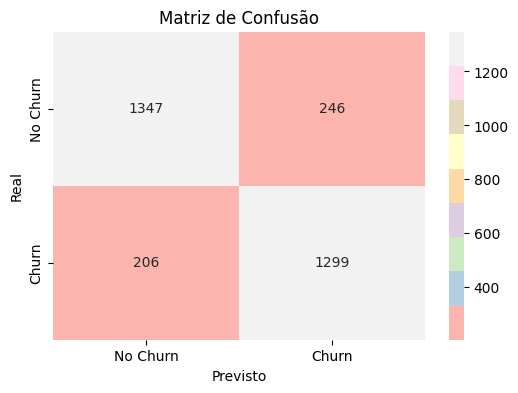

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#Previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

#Calcular métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualização com 'print' das métricas de avaliação
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print('Matriz de confusão:')
print(conf_matrix)

# Visualização da matrix de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Pastel1', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

##Análise de Importância das Variáveis

In [21]:
#Investigando os Coeficientes do modelo de Regressão Logística

# Acessa os nomes das colunas originais
feature_names = X.columns

# Acessa os coeficientes do modelo treinado
coefficients = logistic_model.coef_[0]

# Cria um DataFrame para uma visualização mais clara
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Ordena o DataFrame para ver as variáveis mais influentes no topo
coefficients_df_sorted = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

print("--- Coeficientes do Modelo de Regressão Logística (Ordenados por Magnitude) ---")
print(coefficients_df_sorted)

--- Coeficientes do Modelo de Regressão Logística (Ordenados por Magnitude) ---
                                          Feature  Coefficient
3                         account.Charges.Monthly    -7.320039
11           internet.InternetService_Fiber optic     3.878548
12                    internet.InternetService_No    -2.814867
8                          phone.PhoneService_Yes     2.797395
1                                 customer.tenure    -2.265523
9            phone.MultipleLines_No phone service     1.661275
17                       internet.StreamingTV_Yes     1.468568
18                   internet.StreamingMovies_Yes     1.445860
4                           account.Charges.Total     1.389654
10                        phone.MultipleLines_Yes     0.909185
2                                       Total.Day    -0.831529
15                  internet.DeviceProtection_Yes     0.662787
14                      internet.OnlineBackup_Yes     0.621754
23         account.PaymentMethod_Elect

​📍 O fator **mais forte** para a não-evasão é o custo mensal da conta `account.Charges.Monthly`. Clientes com mensalidades mais altas são os menos propensos a sair.

O fator **mais fraco** para a evasão é ser ou não um cidadão idoso `customer.SeniorCitizen`. Esta variável não tem praticamente nenhuma influência na decisão de evasão do cliente

--- Importância das Variáveis do Modelo Random Forest ---
                                          Feature  Importance
4                           account.Charges.Total    0.147601
1                                 customer.tenure    0.146472
3                         account.Charges.Monthly    0.114313
23         account.PaymentMethod_Electronic check    0.114096
2                                       Total.Day    0.104104
11           internet.InternetService_Fiber optic    0.047788
21                   account.PaperlessBilling_Yes    0.041070
20                      account.Contract_Two year    0.038730
5                            customer.gender_Male    0.021575
10                        phone.MultipleLines_Yes    0.021188
19                      account.Contract_One year    0.018913
6                            customer.Partner_Yes    0.017363
17                       internet.StreamingTV_Yes    0.015924
22  account.PaymentMethod_Credit card (automatic)    0.015757
18          

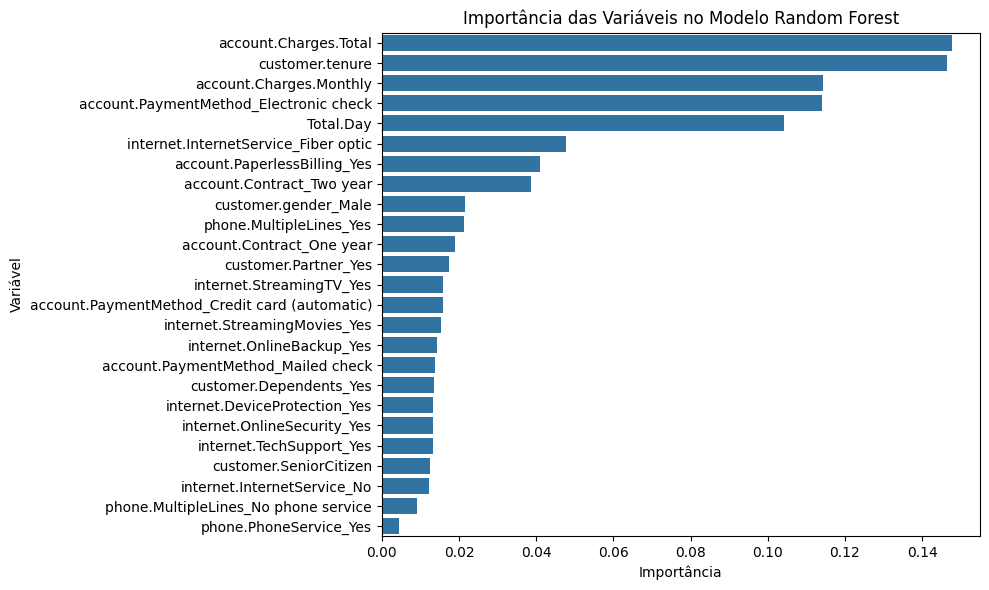

In [22]:
#Verificar a importância das variáveis no modelo Random Forest
# Acessa a importância das variáveis do modelo treinado
feature_importances = rf_model.feature_importances_

# Acessa os nomes das colunas do seu DataFrame de treino
feature_names = X_train.columns

# Cria um DataFrame para uma visualização mais clara
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Ordena o DataFrame para ver as variáveis mais importantes no topo
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

print("--- Importância das Variáveis do Modelo Random Forest ---")
print(importance_df_sorted)

# Opcional: Visualização gráfica da importância das variáveis
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_sorted)
plt.title('Importância das Variáveis no Modelo Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

​📍 A variável **mais importante** é a `account.Charges.Total`, com uma pontuação de 0.147601. Isso significa que o valor total que o cliente já pagou à empresa é o fator mais decisivo para o modelo prever se ele irá evadir ou não.

A variável **menos importante** é a `phone.PhoneService_Yes`, com uma pontuação de 0.004434. Isso indica que, para o seu modelo, o fato de o cliente ter ou não um serviço de telefonia fixa tem um impacto quase nulo na previsão de evasão.

##📚​ Relatório de Análise de Evasão de Clientes (Churn)


A análise foi baseada nos coeficientes da **Regressão Logística** e na importância das variáveis do **Random Forest**, fornecendo uma visão detalhada de como cada característica contribui para a probabilidade de um cliente sair da empresa.
- - -
Os modelos de previsão de evasão foram consistentes, com o Random Forest se destacando. Ele obteve uma acurácia de 85,41%, o que significa que foi bastante eficaz em prever quais clientes iriam sair. Sua capacidade de identificar corretamente os clientes que evadiriam (recall de 86,31%) e de evitar previsões falsas de evasão (precisão de 84,08%) foi considerada excelente.

Ambos os modelos de análise de evasão de clientes (churn) identificaram os fatores financeiros e de lealdade como os mais influentes.



* **Valor Total da Conta (account.Charges.Total):** Identificado como o fator mais importante pelo Random Forest, clientes que já gastaram mais dinheiro com a empresa são mais leais e menos propensos a sair. Isso sugere que clientes que pagam mensalidades mais altas, possivelmente por pacotes de serviços mais completos, são mais engajados e satisfeitos, diminuindo a probabilidade de churn.

* **Tempo de Permanência (customer.tenure):** Clientes que estão há mais tempo na empresa são mais fiéis e menos propensos a sair. A Regressão Logística reforça isso com um coeficiente negativo forte.

* **Gasto Diário (Total_Day):** Esta variável, que representa o gasto diário do cliente, foi considerada muito importante pelo Random Forest. A Regressão Logística também mostrou um coeficiente negativo (-0.831529), indicando que clientes com maior gasto diário são menos propensos a evadir.

- - -
###⚠️ Fatores Relacionados a Serviço e Processo

*  Clientes que usam cheque eletrônico para pagar são um grupo de alto risco de evasão. Os modelos identificaram esse método de pagamento como um forte indicativo de que o cliente pode sair, possivelmente devido a problemas no processo ou a um menor engajamento com a empresa.

*  Clientes com fibra óptica são um grupo de alto risco, possivelmente insatisfeitos com a qualidade, suporte ou preço do seviço.
- - -

####​Estratégias de retenção com base nos resultados obtidos:


*   **Recompensar clientes com programas de fidelidade baseados nos altos gastos mensais e totais.** Esses clientes são os mais leais e valiosos. Recompensá-los pode solidificar ainda mais a relação e incentivá-los a permanecer.

*   **Monitorar proativamente a atividade e o gasto diário dos clientes para identificar sinais de insatisfação.** Uma queda súbita no gasto diário de um cliente valioso pode ser um sinal precoce de insatisfação. Nesses casos, a empresa pode fazer um contato proativo para entender o problema e oferecer soluções.

*  **Investigar e melhorar o serviço de fibra óptica, pois os clientes desse segmento têm alto risco de evasão.** O alto risco de churn nesse segmento indica que há um problema de qualidade ou valor que precisa ser analisado.

*   **Otimizar a experiência de pagamento para clientes que usam cheque eletrônico.** A empresa deve buscar entender por que este grupo de clientes é mais propenso a sair e se há problemas no método de pagamento que podem ser resolvidos.

*   **Focar em reter clientes novos, para obter a lealdade a longo prazo.** Os primeiros meses são críticos. Uma boa recepção e ofertas especiais para o primeiro ano podem ajudar a reduzir a taxa de churn nesse período.






